# General concepts

Probably the most important thing I learned this semester was the language that powers AI. I had never used Python before this class and I deeply appreciate the flexibilty the language offers. 

Things I learned that are unique to Python:
* dicts
* tuples
* Generator expressions / List comprehension
* dunder methods
* Python's Type hinting

Along the way I most defintely learned how to use the libaries and tool found in ML:
* numpy
* keras
* pandas
* openCV
* tensorflow
* iPython
* Jupyter Notebooks (and Google Colab)
* matplotlib

Python was an amazing language to learn and one I plan to keep on using and learning more about! It was the perfect language to answer many of my concerns with JavaScript. I perfectly underwhat why it is the language of Data Sci/ML!

## What is AI?

I learned about the difference between Machine Learning and Artifical Intelligence. I know prior to class I thought they were much of the same thing, but my mind was blown to know it was just a subfield! It was also cool to briefly touch on Symbolic AI at the beginning of the course.

Knowing about GOFAI made me truly appreciate the scabaility and nature of modern advancements in ML/DL. 


It was also fun to learn and pick up many of the less talked about skills needed to perform AI/Data Science. Such as cleaning/working with a dataset, tuning a model, plotting a model, etc

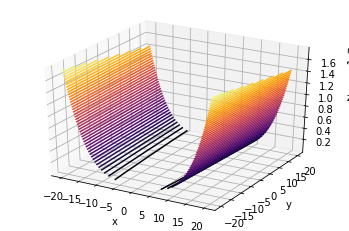

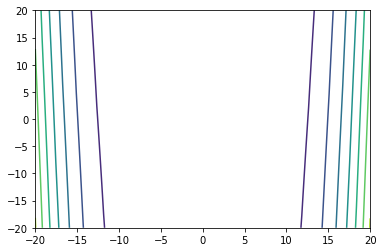

In [3]:
# Plotting with Matplotlib:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def minLocal(x, y):
  return ((100 - x)**2) + (100*(y - x**2)**2)

def plot3D(X, Y, Z):
  fig = fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.contour3D(X, Y, Z, 50, cmap='inferno')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  plt.show()
    
    
def plot2D(X, Y, Z):
  plt.contour(X,Y,Z)
  plt.show()

class Graph:
  def __init__(self):
    self.n = 20
  def plot(self, function):
    x = np.linspace(-self.n, self.n)
    y = np.linspace(-self.n, self.n)
    X, Y = np.meshgrid(x,y)
    Z = function(X, Y)
    plot3D(X, Y, Z)
    plot2D(X, Y, Z)

graph = Graph()
graph.plot(minLocal)

In [4]:
# Example of Pythons "type" system
from typing import List

def foo(param: List[str]) -> str:
  return ' '.join(param)

foo(['Hello', 'World!'])

'Hello World!'

In [0]:
# Generating a fake dataset using numpy:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
# Our dataset
x1 = 2 * np.random.rand(200,1)
x2 = 2 * np.random.rand(200,1)
ys = 4 + (3 * x1 + 3 * x2) + np.random.rand(200,1)

# Our test dataset including labels
test_x1 = x1[100:]
test_x2 = x2[100:] 
test_ys = ys[100:]

# Our training dataset
train_x1 = x1[:100]
train_x2 = x2[:100]
train_ys = ys[:100]

# loading data using tensorflow:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Building a model

The amount of models present in the field of ML truly surprised me! I had no clue that so many types of models could have existed. I know one of the most prominent models we used in class was a ConvNet or CNN. In addition to the class slides and notebooks I found this resource to be extremely helpful.

From my knowledge the basic structure of a ConvNet goes as follows: 
Convolution -> Pooling -> Convolution -> Pooling -> Fully Connected Layer -> Output

With a ConvNet we taking the input data and separate it into "regions" we grab the max value of those regions (max-pooling) and let that flow through the network. 

During HW3 when we saw the model summary for the very large NSANet model and to know that some amazing advancements in deep learning are models that are 1000 of layers deep was truly surprising. Good thing they dont have to train on Colab!


In [7]:
from tensorflow import keras
from keras.layers import Dense
from keras.utils import to_categorical
from keras import optimizers, layers, models

model = models.Sequential()
# Start with Convolution!
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Pooling!
model.add(layers.MaxPooling2D((2, 2)))

# More Convolution!
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# More Pooling!
model.add(layers.MaxPooling2D((2, 2)))

# Even more Convolution!
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))

# Even more pooling!
model.add(layers.MaxPooling2D((2, 2)))

# Combat Overfitting and finish off with a fully connected layer!
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Compiling a model

As a software engineer when I hear the word 'compiling' I instantly think of hitting 'run' on my code or typing gcc into the command line. To see it used in a different context defintely threw me off at first. When I later learned that compiling a model is merely defining its loss function, optimizer, and metrics it cleared the confusion in my mind. 

All the mathematics behind choosing a good loss function, optimizer, and metrics, truly boggles my mind. Makes me wish I took Calculus more seriously! 


So let me define some of the vocabulary I learned throughout the semester:

* Optimzier - This helps us fine the min or max of an Objective/Error Function. Different optimizers seem to be suited for different task. We want to mess around with different optimizers/learning rates to see what can nab us the best performance for our model.

* loss function - This one is very easy to describe. How well does a specific algorithim model the given data.

*  Metrics - Used to compare the models output to the original label. This allows us to form a basis or distance of the models prediction to the actual data




In [9]:
# How compiling a model works: 
opt = optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(
    optimizer=opt, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

# Training a model

I learned how to combat overfitting by using dropout. I got to visually see what underfitting looks like with a graph and how both of these are problematic for development of a model. What I found most interesting is how they also mirror human biases in a way. While I cannot recall from memory I am sure there are some psychological concepts that are equivalent to overfitting and underfitting in our human mind.

I know from the class and reading the news how many recent advancements in AI have been thanks to modeling how the human brain works. It amazes me how we can also model the flaws of the human brain with our neural networks. 



In [0]:
# Underfit Model for CIFAR10
model_underfit = models.Sequential()
model_underfit.add(layers.Conv2D(64, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_underfit.add(layers.Conv2D(64, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
model_underfit.add(layers.MaxPooling2D((2, 2)))
model_underfit.add(layers.Conv2D(64, (3, 3), activation='sigmoid', kernel_initializer='he_uniform', padding='same'))
model_underfit.add(layers.Conv2D(64, (3, 3), activation='tanh', kernel_initializer='he_uniform', padding='same'))
model_underfit.add(layers.MaxPooling2D((2, 2)))
model_underfit.add(layers.Flatten())
model_underfit.add(layers.Dropout(0.9))
model_underfit.add(layers.Dense(32, activation='sigmoid', kernel_initializer='he_uniform'))
model_underfit.add(layers.Dense(10, activation='softmax'))

opt = optimizers.SGD(lr=0.001, momentum=0.9)
model_underfit.compile(
    optimizer=opt, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

epochs = 15
history_underfit = model_underfit.fit(
    train_images, 
    train_labels, 
    epochs=epochs, 
    batch_size=64, 
    validation_data=(test_images, test_labels)
)

# Training/test loss/accuracy during training
history_dict_underfit = history_underfit.history
loss_values_underfit = history_dict_underfit['loss']
test_loss_values_underfit = history_dict_underfit['val_loss']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_values_underfit, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values_underfit, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and test accuracy
acc_values_underfit = history_dict_underfit['acc']
test_acc_values_underfit = history_dict_underfit['val_acc']
plt.plot(epochs_range, acc_values_underfit, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values_underfit, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/15





23744/50000 [=============>................] - ETA: 4:29 - loss: 2.3565 - acc: 0.1008

In [0]:
# Overfit Model for CIFAR10
model_overfit = models.Sequential()
model_overfit.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_overfit.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_overfit.add(layers.MaxPooling2D((2, 2)))
model_overfit.add(layers.Flatten())
model_underfit.add(layers.Dropout(0.01))
model_overfit.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_overfit.add(layers.Dense(10, activation='softmax'))

opt = optimizers.SGD(lr=0.001, momentum=0.9)
model_overfit.compile(
    optimizer=opt, 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

epochs = 20
history_overfit = model_overfit.fit(
    train_images, 
    train_labels, 
    epochs=epochs, 
    batch_size=64, 
    validation_data=(test_images, test_labels)
)

# Training/test loss/accuracy during training
history_dict_overfit = history_overfit.history
loss_values_overfit = history_dict_overfit['loss']
test_loss_values_overfit = history_dict_overfit['val_loss']
epochs_range = range(1, epochs+1)
plt.plot(epochs_range, loss_values_overfit, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values_overfit, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and test accuracy
acc_values_overfit = history_dict_overfit['acc']
test_acc_values_overfit = history_dict_overfit['val_acc']
plt.plot(epochs_range, acc_values_overfit, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values_overfit, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Fine Tuning  a pre-trained model

When Wocjan said that PhD researchers develop an 'inutitive' understanding for AI I very much see what he meant. Fine tuning a pre-trained model is quite the challenge and requires a deeper understandng of the mathematics behind ML to truly accomplish this

However I can detail what I did in my homework assignments:
* Adjust the number of epochs
* Adjust learning rate and hyperparameters
* Add more layers to the model, change loss function, optimizer, activation functions, or metrics
* Augument the dataset by creating more examples using the existing data or adding more
* Research what others have done for the problem I am stuck with
* Investigate how the layers might be interacting and what to do
* Follow best practices for building a model
* Change what the input data looks like (RGB vs Greyscale, IMG SIZE)
* Change, add, or remove features

I feel as if with over time and more models built/trained I can develop a much deeper understanding of what type of fine tuning I need to perform just by looking at the models performance or graph. 
